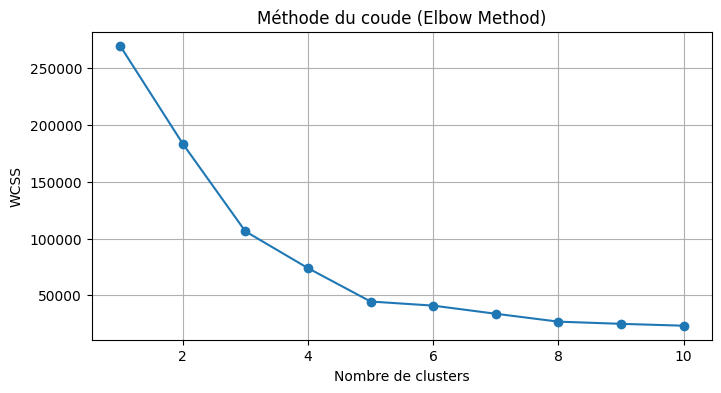

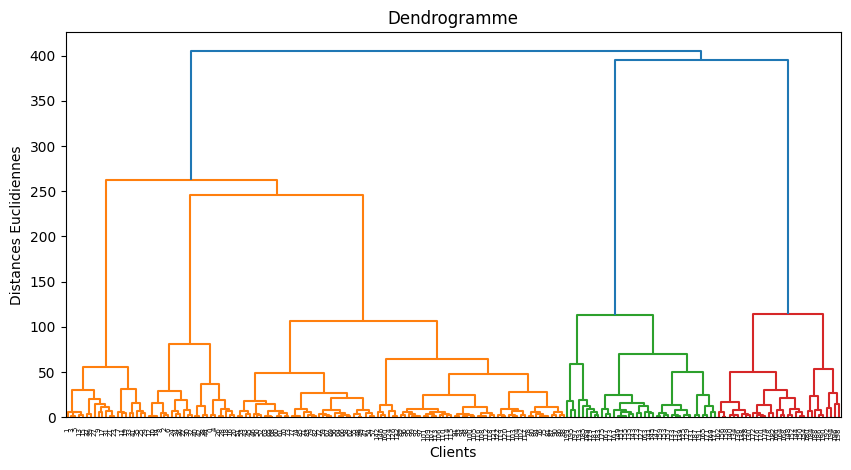

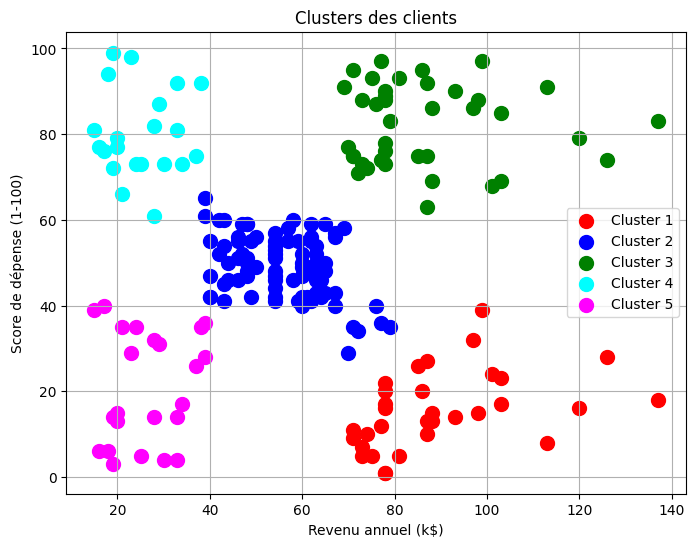

In [2]:
# Clustering des données des clients d'un centre commercial en utilisant HCA

# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans  # Ajouté pour la méthode du coude

# Charger le dataset
data = pd.read_csv('Mall_Customers.csv')

# Sélectionner les colonnes pertinentes : Revenu annuel et score de dépenses
X = data.iloc[:, [3, 4]].values

# ------------------------ Méthode du coude pour K-means ------------------------
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du coude (Elbow Method)')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# ------------------------ Dendrogramme pour déterminer le nombre optimal de clusters ------------------------
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogramme')
plt.xlabel('Clients')
plt.ylabel('Distances Euclidiennes')
plt.show()

# ------------------------ Clustering hiérarchique agglomératif ------------------hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# ------------------------ Visualisation des clusters ------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')

plt.title('Clusters des clients')
plt.xlabel('Revenu annuel (k$)')
plt.ylabel('Score de dépense (1-100)')
plt.legend()
plt.grid(True)
plt.show()
